In [1]:
from utils import Helix, labels_dist, labels_orientation

In [2]:
import py3Dmol
import matplotlib.pyplot as plt

### Provide sequence of the first helix strand
A,C,G,T: regular bases

c, g   : spin label 

In [3]:
sequence_evn = 'GTcAGTCgCgCgCgCgCATC'
sequence_odd = 'GTcAGTgCgCgCgCgCgATC'

### Experimental PELDOR distances

In [4]:
exp_id_dna   = [4,5,6,7,8,9,10,11,12,13,14]
exp_dist_dna = [20.1,21.4,25.4,26.6,28.4,30,32.2,34.1,38.3,42.9,45.0]

exp_id_rna   = [7,8,9,10,11,12,13,14]
exp_dist_rna = [21.2,23.2,26.6,28.7,31.0,33.6,36.2,38.1]

### Select helix type, base step parameters and base pair flatness

In [5]:
na_type    = 'DNA' # 'DNA' or 'RNA'
helix_form = 'B' # 'B' or 'A' or 'Apr'
bs_param   = 'seq' # 'avg' or 'seq'

bp_flat    = False # True or False

### Make the helices and get distances between each label and the first one

In [6]:
helix_evn = Helix(sequence_evn, na_type + bs_param + helix_form, bp_flat)
helix_odd = Helix(sequence_odd, na_type + bs_param + helix_form, bp_flat)
evn_N, evn_O, evn_id = labels_dist(helix_evn)
odd_N, odd_O, odd_id = labels_dist(helix_odd)

### Visualize generated helix

In [7]:
#!jupyter labextension install jupyterlab_3dmol

In [8]:
pdb_file = 'helix_odd.pdb'
helix_odd.write_pdb(pdb_file)
helix_odd.write_axis_pdb()
helix_odd.write_center_pdb()

#First we assign the py3Dmol.view as view
view = py3Dmol.view()
#read the PDB file
view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

#Here we set the visualization style
view.setStyle({'stick': {'color':'spectrum'}})

#Zooming into all visualized structures 
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Compare PELDOR distances with model

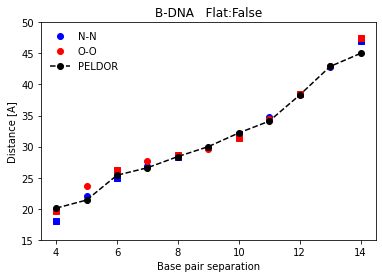

In [9]:
plt.plot(evn_id,evn_N,'bo',label='N-N')
plt.plot(evn_id,evn_O,'ro',label='O-O')
plt.plot(odd_id,odd_N,'bs')
plt.plot(odd_id,odd_O,'rs')
plt.plot(exp_id_dna,exp_dist_dna,'--ok',label="PELDOR")

plt.xlabel("Base pair separation")
plt.ylabel("Distance [A]")
title = f"{helix_form}-{na_type}   Flat:{bp_flat}"
plt.title(title)
plt.ylim(15,50)
plt.legend(frameon=False,loc=2);

### Repeat for dsRNA

In [10]:
na_type    = 'RNA' # 'DNA' or 'RNA'
helix_form = 'Apr' # 'B' or 'A' or 'Apr'
bs_param   = 'avg' # 'avg' or 'seq'

bp_flat    = False # True or False

helix_evn = Helix(sequence_evn.replace('T','U'), na_type + bs_param + helix_form, bp_flat)
helix_odd = Helix(sequence_odd.replace('T','U'), na_type + bs_param + helix_form, bp_flat)

evn_N_rna, evn_O_rna, evn_id_rna = labels_dist(helix_evn)
odd_N_rna, odd_O_rna, odd_id_rna = labels_dist(helix_odd)

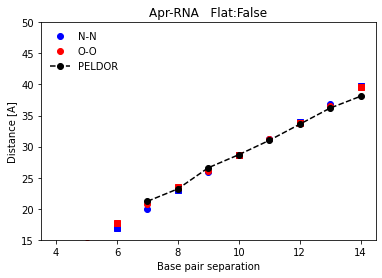

In [11]:
plt.plot(evn_id_rna,evn_N_rna,'bo',label='N-N')
plt.plot(evn_id_rna,evn_O_rna,'ro',label='O-O')
plt.plot(odd_id_rna,odd_N_rna,'bs')
plt.plot(odd_id_rna,odd_O_rna,'rs')
plt.plot(exp_id_rna,exp_dist_rna,'--ko',label="PELDOR")
plt.xlabel("Base pair separation")
plt.ylabel("Distance [A]")
title = f"{helix_form}-{na_type}   Flat:{bp_flat}"
plt.title(title)
plt.ylim(15,50)
plt.legend(frameon=False,loc=2);

In [12]:
pdb_file = 'helix_evn.pdb'
helix_evn.write_pdb(pdb_file)
helix_evn.write_axis_pdb()
helix_evn.write_center_pdb()

#First we assign the py3Dmol.view as view
view = py3Dmol.view()
#read the PDB file
view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

#Here we set the visualization style
view.setStyle({'stick': {'color':'spectrum'}})

#Zooming into all visualized structures 
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Get Euler angles between each spin label and the first one

In [13]:
from scipy.spatial.transform import Rotation as R

In [14]:
rots, odd_id_rna = labels_orientation(helix_odd)
for i in range(len(odd_id_rna)):
    r = R.from_matrix(rots[i])
    print(r.as_euler('zyx', degrees=True))

[120.57656811   8.9629067  163.68875619]
[ 59.77795735   9.18925625 174.26396574]
[  0.20685318   0.23459705 179.66459335]
[-59.29966245  -8.95163502 174.67394054]
[-120.09819918   -9.20061338  164.0992498 ]
[-179.67250903   -0.25743032  158.67935073]
